In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [81]:
from sklearn.metrics import classification_report, confusion_matrix
def print_err_matrix(Y_test, Y_pred) :
    cm = np.array(confusion_matrix(Y_test, Y_pred))
    confusion = pd.DataFrame(cm, index = ["is_cancer", "is_healthy"] , 
                         columns = ["predicted_cancer", "predicted_healthy"])
    sns.heatmap(confusion, annot = True)
    return confusion

In [82]:
data = pd.read_csv('/home/kolmogorov/Desktop/AI/breastCancer.csv')

In [83]:
data.shape

(569, 33)

In [84]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [85]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**PREPROCESSING**

In [86]:
data.head()
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)

In [87]:
data['diagnosis'] = (data['diagnosis'].str.match('M')).astype(int)

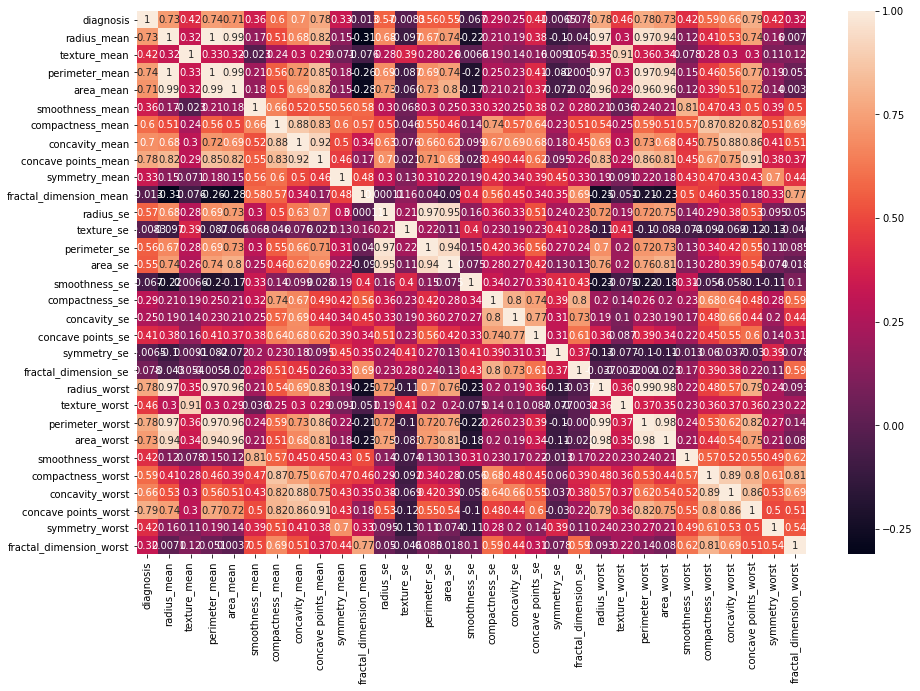

In [88]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)

In [89]:
data.head()
data.drop(["concavity_mean", "radius_mean", "area_mean", "radius_se", "texture_worst", "radius_worst", "concave points_mean", "compactness_worst", "perimeter_se", "perimeter_worst", "perimeter_mean", "concavity_worst", "compactness_se", "concave points_worst", "area_worst"],axis=1,inplace=True)

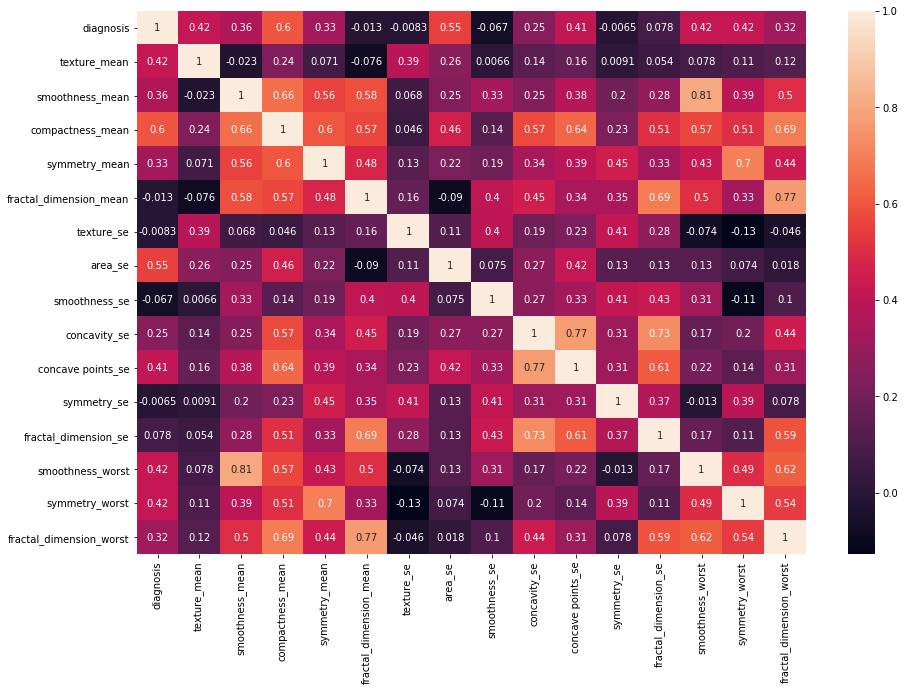

In [90]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)

In [91]:
data.shape

(569, 16)

**MINMAXSCALAR**

In [92]:
Y=data.diagnosis.values
X_data=data.drop(["diagnosis"], axis=1)
X=(X_data-np.min(X_data))/(np.max(X_data) -np.min(X_data))

In [93]:
X_data.head()

,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,10.38,0.11840,0.27760,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.01587,0.03003,0.006193,0.1622,0.4601,0.11890
1,17.77,0.08474,0.07864,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01340,0.01389,0.003532,0.1238,0.2750,0.08902
2,21.25,0.10960,0.15990,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02058,0.02250,0.004571,0.1444,0.3613,0.08758
3,20.38,0.14250,0.28390,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.01867,0.05963,0.009208,0.2098,0.6638,0.17300
4,14.34,0.10030,0.13280,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01885,0.01756,0.005115,0.1374,0.2364,0.07678


In [94]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [95]:
X.head()

,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,0.022658,0.593753,0.792037,0.686364,0.605518,0.120469,0.273811,0.159296,0.135682,0.300625,0.311645,0.183042,0.601136,0.598462,0.418864
1,0.272574,0.289880,0.181768,0.379798,0.141323,0.082589,0.125660,0.119387,0.046970,0.253836,0.084539,0.091110,0.347553,0.233590,0.222878
2,0.390260,0.514309,0.431017,0.509596,0.211247,0.094303,0.162922,0.150831,0.096768,0.389847,0.205690,0.127006,0.483590,0.403706,0.213433
3,0.360839,0.811321,0.811361,0.776263,1.000000,0.175875,0.038155,0.251453,0.142955,0.353665,0.728148,0.287205,0.915472,1.000000,0.773711
4,0.156578,0.430351,0.347893,0.378283,0.186816,0.093065,0.163688,0.332359,0.143636,0.357075,0.136179,0.145800,0.437364,0.157500,0.142595


**TRAINING**
__________________________________________________________________________________________________________________


**DECISION TREE CLASSIFIER**

In [96]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.5,random_state=42)

In [116]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(max_depth = 5)
dt.fit(X_train,Y_train)
print("score test : ",dt.score(X_test,Y_test))
print("score train : ",dt.score(X_train,Y_train))

score test :  0.8701754385964913
score train :  0.9788732394366197


Err_Matrix for train set:

            predicted_cancer  predicted_healthy
is_cancer                167                  3
is_healthy                 3                111


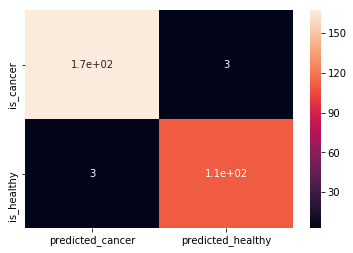

In [98]:
print('Err_Matrix for train set:')
confusion = print_err_matrix(Y_train, dt.predict(X_train))
print()
print(confusion)

Err_Matrix for test set:

            predicted_cancer  predicted_healthy
is_cancer                164                 23
is_healthy                14                 84


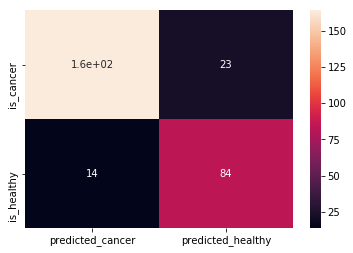

In [99]:
print('Err_Matrix for test set:')
confusion = print_err_matrix(Y_test, dt.predict(X_test))
print()
print(confusion)

**RANDOMFORESTCLASSIFIER**

Err_Matrix for train set:

            predicted_cancer  predicted_healthy
is_cancer                168                  2
is_healthy                 8                106


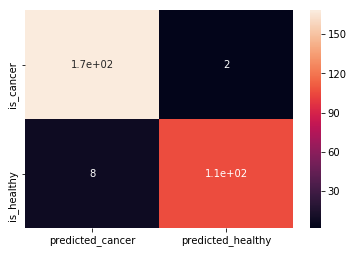

In [100]:
rf_clf = RandomForestClassifier(n_estimators=4,
                                n_jobs=2, 
                                random_state=42, 
                                criterion='entropy',
                                max_depth=5)
rf_clf.fit(X_train, Y_train)
print('Err_Matrix for train set:')
confusion = print_err_matrix(Y_train, rf_clf.predict(X_train))
print()
print(confusion)

Err_Matrix for test set:

            predicted_cancer  predicted_healthy
is_cancer                167                 20
is_healthy                12                 86


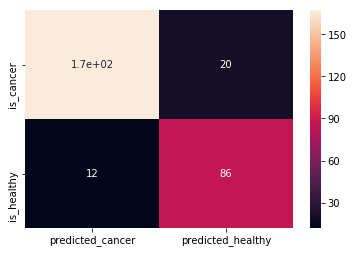

In [101]:
print('Err_Matrix for test set:')
confusion = print_err_matrix(Y_test, rf_clf.predict(X_test))
print()
print(confusion)

In [102]:
print("score test : ",rf_clf.score(X_test,Y_test))
print("score train : ",rf_clf.score(X_train,Y_train))

score test :  0.887719298245614
score train :  0.9647887323943662


**SVM**

In [103]:
model = SVC()
model.fit(X_train, Y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [104]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf', 'linear']}

In [105]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

In [106]:
grid.fit(X_train, Y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] gamma=1, kernel=rbf, C=0.1 ......................................
[CV] .......... gamma=1, kernel=rbf, C=0.1, score=0.747, total=   0.0s
[CV] gamma=1, kernel=rbf, C=0.1 ......................................
[CV] .......... gamma=1, kernel=rbf, C=0.1, score=0.779, total=   0.0s
[CV] gamma=1, kernel=rbf, C=0.1 ......................................
[CV] .......... gamma=1, kernel=rbf, C=0.1, score=0.766, total=   0.0s
[CV] gamma=1, kernel=linear, C=0.1 ...................................
[CV] ....... gamma=1, kernel=linear, C=0.1, score=0.695, total=   0.0s
[CV] gamma=1, kernel=linear, C=0.1 ...................................
[CV] ....... gamma=1, kernel=linear, C=0.1, score=0.663, total=   0.0s
[CV] gamma=1, kernel=linear, C=0.1 ...................................
[CV] ....... gamma=1, kernel=linear, C=0.1, score=0.681, total=   0.0s
[CV] gamma=0.1, kernel=rbf, C=0.1 ....................................
[CV] ........ g

[CV] .... gamma=0.0001, kernel=linear, C=1, score=0.937, total=   0.0s
[CV] gamma=0.0001, kernel=linear, C=1 ................................
[CV] .... gamma=0.0001, kernel=linear, C=1, score=0.937, total=   0.0s
[CV] gamma=0.0001, kernel=linear, C=1 ................................
[CV] .... gamma=0.0001, kernel=linear, C=1, score=0.915, total=   0.0s
[CV] gamma=1, kernel=rbf, C=10 .......................................
[CV] ........... gamma=1, kernel=rbf, C=10, score=0.968, total=   0.0s
[CV] gamma=1, kernel=rbf, C=10 .......................................
[CV] ........... gamma=1, kernel=rbf, C=10, score=0.958, total=   0.0s
[CV] gamma=1, kernel=rbf, C=10 .......................................
[CV] ........... gamma=1, kernel=rbf, C=10, score=0.957, total=   0.0s
[CV] gamma=1, kernel=linear, C=10 ....................................
[CV] ........ gamma=1, kernel=linear, C=10, score=0.937, total=   0.0s
[CV] gamma=1, kernel=linear, C=10 ....................................
[CV] .

[CV] ...... gamma=0.01, kernel=rbf, C=1000, score=0.957, total=   0.0s
[CV] gamma=0.01, kernel=linear, C=1000 ...............................
[CV] ... gamma=0.01, kernel=linear, C=1000, score=0.968, total=   0.0s
[CV] gamma=0.01, kernel=linear, C=1000 ...............................
[CV] ... gamma=0.01, kernel=linear, C=1000, score=0.958, total=   0.0s
[CV] gamma=0.01, kernel=linear, C=1000 ...............................
[CV] ... gamma=0.01, kernel=linear, C=1000, score=0.936, total=   0.0s
[CV] gamma=0.001, kernel=rbf, C=1000 .................................
[CV] ..... gamma=0.001, kernel=rbf, C=1000, score=0.947, total=   0.0s
[CV] gamma=0.001, kernel=rbf, C=1000 .................................
[CV] ..... gamma=0.001, kernel=rbf, C=1000, score=0.947, total=   0.0s
[CV] gamma=0.001, kernel=rbf, C=1000 .................................
[CV] ..... gamma=0.001, kernel=rbf, C=1000, score=0.926, total=   0.0s
[CV] gamma=0.001, kernel=linear, C=1000 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

Err_Matrix for train set:

            predicted_cancer  predicted_healthy
is_cancer                170                  0
is_healthy                 7                107


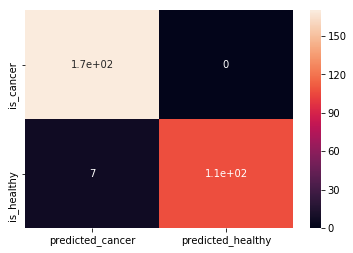

In [107]:
print('Err_Matrix for train set:')
confusion = print_err_matrix(Y_train, grid.predict(X_train))
print()
print(confusion)

Err_Matrix for test set:

            predicted_cancer  predicted_healthy
is_cancer                179                  8
is_healthy                 7                 91


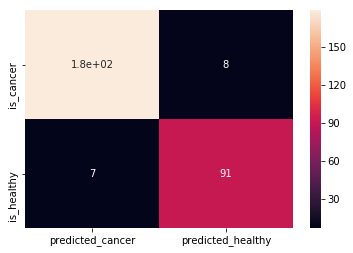

In [108]:
print('Err_Matrix for test set:')
confusion = print_err_matrix(Y_test, grid.predict(X_test))
print()
print(confusion)

In [109]:
print("score test : ",grid.score(X_test,Y_test))
print("score train : ",grid.score(X_train,Y_train))

score test :  0.9473684210526315
score train :  0.9753521126760564


In [121]:
fImportance = pd.Series(rf_clf.feature_importances_,index=X.columns).sort_values()

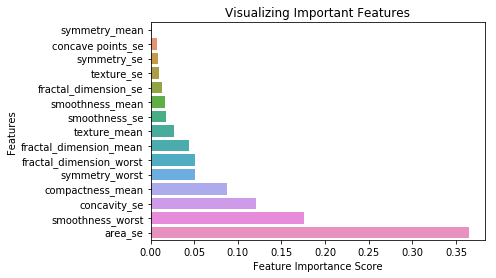

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x=fImportance, y=fImportance.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

**Multilayer Perceptron**

In [110]:
from sklearn.neural_network import MLPClassifier

In [111]:
MLP = MLPClassifier(hidden_layer_sizes = (5, 10, 20, 30, 20, 10, 5)).fit(X_train, Y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Err_Matrix for test set:

            predicted_cancer  predicted_healthy
is_cancer                182                  5
is_healthy                 3                 95


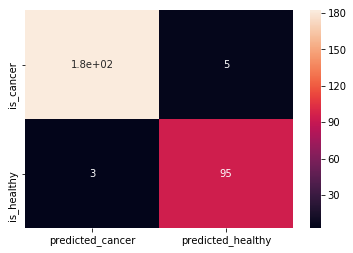

In [112]:
print('Err_Matrix for test set:')
confusion = print_err_matrix(Y_test, MLP.predict(X_test))
print()
print(confusion)

Err_Matrix for test set:

            predicted_cancer  predicted_healthy
is_cancer                167                  3
is_healthy                 7                107


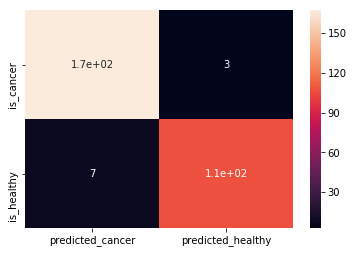

In [113]:
print('Err_Matrix for test set:')
confusion = print_err_matrix(Y_train, MLP.predict(X_train))
print()
print(confusion)

In [114]:
print("score test : ",MLP.score(X_test,Y_test))
print("score train : ",MLP.score(X_train,Y_train))

score test :  0.9719298245614035
score train :  0.9647887323943662
